Exercise 1: The data below is for an image classification problem. Your tasks are as follows:



1.   Write Dataloaders
2.   Train DNN
3.   Get labels for test set
4.   Upload the code (.ipynb) and your labels titled (submission.csv)



Your codes should be original, codes copied from the internet will result in automatic fail. You can use Phyton libraries in your work




In [ ]:
!wget -O data.zip https://www.dropbox.com/s/ycmjuhxqprj0s8j/data.zip?dl=0
!unzip data.zip

In [ ]:
import os
os.path.join('/data/images', 'train', '0.jpg')

'/data/images/train/0.jpg'

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision.transforms import v2
from PIL import Image

import os
import pandas as pd

class MyDataSet(Dataset):
    def __init__(self, images, labels, split='train', transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])):
        self.split = split
        self.images = os.path.join(images, self.split)
        self.dataset = [os.path.join(self.images, img) for img in os.listdir(self.images)]
        self.labels = pd.read_csv(labels)
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img = self.dataset[idx]
        img = Image.open(img).convert('RGB')
        img = self.transform(img)

        if self.split == 'train':
            label = self.labels.iloc[idx, 1]
            return img, label
        else:
            return img

In [ ]:
train_set = MyDataSet(images='/content/data/images', labels='/content/data/train_labels.csv', split='train')
test_set = MyDataSet(images='/content/data/images', labels='/content/data/train_labels.csv', split='test')

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)

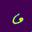

In [ ]:
v2.functional.to_pil_image(train_set[5][0])

In [ ]:
train_set[5][1]

6